### Import Libraries

In [1]:
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [2]:
# Load the SBI dataset from NSEpy api
from datetime import date
from nsepy import get_history
df = get_history(symbol='SBIN',
                   start=date(2000,1,1),
                   end=date(2019,10,21))
#We have loaded data of 19 years till October 21th 2019

In [3]:
df.tail()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2019-10-14,SBIN,EQ,254.55,256.95,259.40,254.0,255.30,255.45,257.29,28265136,7.272417e+14,179273.0,4441315.0,0.1571
2019-10-15,SBIN,EQ,255.45,256.45,259.90,254.8,258.50,258.45,257.06,23444973,6.026737e+14,158570.0,3020988.0,0.1289
2019-10-16,SBIN,EQ,258.45,259.30,261.95,255.0,255.95,256.05,258.26,30892295,7.978238e+14,208840.0,5747423.0,0.1860
2019-10-17,SBIN,EQ,256.05,256.40,266.00,255.6,265.30,265.45,261.38,37061013,9.686893e+14,252073.0,9998027.0,0.2698
2019-10-18,SBIN,EQ,265.45,264.40,271.35,263.2,269.20,269.65,268.50,33203721,8.915263e+14,203094.0,9219181.0,0.2777


In [4]:
# Get the Close Price
df = df[['Close']]
#Take a look at the new data
print(df.head())

             Close
Date              
2000-01-03  243.65
2000-01-04  259.10
2000-01-05  248.45
2000-01-06  261.00
2000-01-07  273.30


In [5]:
# A variable for predicting 'n' days out into the future
future_out = 22 #'n=22' days
#Create another column (the target or dependent variable) shifted 'n' units up
df['Prediction'] = df[['Close']].shift(-future_out)
#print the new data set
print(df.tail())

             Close  Prediction
Date                          
2019-10-14  255.45         NaN
2019-10-15  258.45         NaN
2019-10-16  256.05         NaN
2019-10-17  265.45         NaN
2019-10-18  269.65         NaN


In [6]:

### Create the independent data set (X)  #######
# Convert the dataframe to a numpy array
X = np.array(df.drop(['Prediction'],1))

#Remove the last 'n' rows
X = X[:-future_out]
print(X)

[[243.65]
 [259.1 ]
 [248.45]
 ...
 [287.05]
 [291.7 ]
 [284.7 ]]


In [7]:
# Create the dependent data set (y)
# Convert the dataframe to a numpy array (All of the values including the NaN's)
y = np.array(df['Prediction'])
# Get all of the y values except the last 'n' rows
y = y[:-future_out]
print(y)

[258.8  255.9  247.4  ... 256.05 265.45 269.65]


In [8]:
# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
# Create and train the Support Vector Machine (Regressor)
svr_rbf = SVR(kernel='rbf', C=3000, gamma=0.0001)
svr_rbf.fit(x_train, y_train)

SVR(C=3000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.0001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [10]:

# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
svm_confidence = svr_rbf.score(x_test, y_test)
print("svm confidence: ", svm_confidence)

svm confidence:  0.9386712428240411


In [11]:
# Create and train the Linear Regression  Model
lr = LinearRegression()
# Train the model
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:

# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
lr_confidence = lr.score(x_test, y_test)
print("lr confidence: ", lr_confidence)

lr confidence:  0.9278749364293177


In [13]:
# Set x_forecast equal to the last 30 rows of the original data set from Adj. Close column
x_forecast = np.array(df.drop(['Prediction'],1))[-future_out:]
print(x_forecast)

[[273.95]
 [280.4 ]
 [274.05]
 [301.7 ]
 [313.75]
 [302.6 ]
 [280.25]
 [281.85]
 [281.2 ]
 [270.8 ]
 [255.95]
 [254.15]
 [249.95]
 [249.1 ]
 [260.95]
 [254.15]
 [254.55]
 [255.45]
 [258.45]
 [256.05]
 [265.45]
 [269.65]]


In [14]:
# Print linear regression model predictions for the next 'n' days
lr_prediction = lr.predict(x_forecast)
print(lr_prediction)

# Print support vector regressor model predictions for the next 'n' days
svm_prediction = svr_rbf.predict(x_forecast)
print(svm_prediction)

[297.43946517 303.68450029 297.53628742 324.30763954 335.97472067
 325.1790398  303.53926692 305.08842292 304.45907829 294.38956429
 280.01146017 278.26865967 274.20212517 273.37913604 284.85257267
 278.26865967 278.65594867 279.52734892 282.43201642 280.10828242
 289.20957392 293.27610842]
[275.26465992 280.03024771 275.34359288 293.12486579 301.75067618
 293.69185225 279.92649768 281.01754246 280.57840677 272.69224353
 258.42588057 256.50061209 251.90963158 250.96838983 263.58669094
 256.50061209 256.93103856 257.89417466 261.04421254 258.53191998
 267.93947984 271.71120107]


**Now we will import sbi data from 20th Oct-2019 to 20th Nov-2019 TO compare our predicted values**

In [22]:
import pandas as pd

In [23]:
sbin = pd.read_csv('sbi_nov.csv')

In [24]:
sbin

,Close
0,270.50
1,275.45
2,262.50
3,281.55
4,281.80
5,280.65
6,289.90
7,312.40
8,313.55
9,314.30


In [25]:
import matplotlib.pyplot as plt

**We will plot a graph to copmare all 3 datasets**

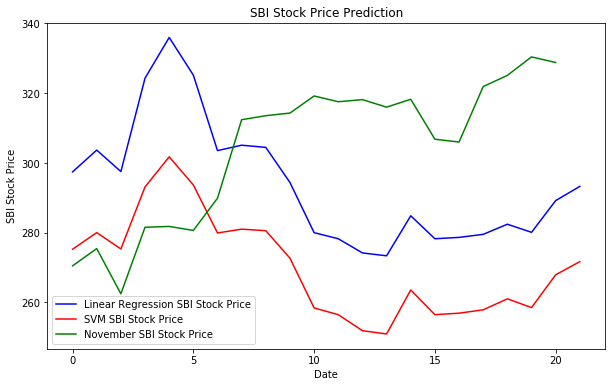

In [26]:
plt.figure(figsize=(10,6))
plt.plot(lr_prediction, color='blue', label='Linear Regression SBI Stock Price')
plt.plot(svm_prediction , color='red', label='SVM SBI Stock Price')
plt.plot(sbin , color='green', label='November SBI Stock Price')
plt.title('SBI Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('SBI Stock Price')
plt.legend()
plt.show()

## Conclusion
#### We have built a decent model. Stock market movement is not random, however using machine learning algorithms we can atleast have an insight about the future about a particular stock